# WeatherPy Analysis
Completed March 2019, by Pantomath

### Observable Trends
What's the weather like as we approach to the equator?

- Based on data as of March 23, 2019, the temperature is hotter closer to the equator. However, cities located between +/-30 degrees latitude appear to have similar arrays of temperature. In otherwords, the temperature is hottest within 30 degrees of the equator.
- The city with the hottest temperature today is Puerto Carreno, located a few degrees north of the equator (latitude 6.19).
- There appears to be no observable correlation between either wind speed and latitude nor humidity and latitude, implying that closer to the equator, it does not get more or less humid, nor does the wind speed up or down.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from weather_api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls

In [62]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#print TEST
#response = requests.get(query_url + "Vancouver").json()
#print(response)

In [10]:
# set up lists to hold reponse info
FoundCities   = []
Cloudiness    = []
Country       = []
Date          = []
Humidity      = []
Lat           = []
Lng           = []
Max_Temp      = []
Wind_Speed    = []

# set up styles for responses
class style:
   BOLD = '\033[1m'
   BLUE = '\033[94m'
   END = '\033[0m'

# print responses
print("Beginning Data Retrieval")
print("-" * 20)

for city in cities:
    
    Set = int(round((cities.index(city)+25.5)/50,0))
    Record = int(cities.index(city)+1 - (50 * (Set -1)))
    
    try:
        response = requests.get(query_url + city).json()
        FoundCities.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
    
        print(f"Processing Record {style.BLUE}{style.BOLD}{Record}{style.END} of Set {style.BLUE}{style.BOLD}{Set}{style.END} | {city}")
    
    except:      
        print(f'City {style.BOLD} not {style.END} found. Skipping {city} ...')
    pass
        
print("-" * 20)
print("Data Retrieval Complete")
print("-" * 20)


Beginning Data Retrieval
--------------------
Processing Record 1 of Set 1 | oncesti
Processing Record 2 of Set 1 | borujerd
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | touros
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | laguna
City  not  found. Skipping vaitupu ...
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | biltine
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | rolla
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | north bend
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | uvat
Processing Record 21 of Set 1 | hambantota
Processing Record 22 of Set 1 | skibbereen
Processing Record 23 of Set 1 | hermanus
City  not  found. Sk

Processing Record 27 of Set 3 | lompoc
Processing Record 28 of Set 3 | malbork
Processing Record 29 of Set 3 | ornskoldsvik
Processing Record 30 of Set 3 | nizwa
Processing Record 31 of Set 3 | dire
Processing Record 32 of Set 3 | gillette
Processing Record 33 of Set 3 | simao
Processing Record 34 of Set 3 | naze
Processing Record 35 of Set 3 | chincha alta
Processing Record 36 of Set 3 | kavaratti
Processing Record 37 of Set 3 | puerto ayora
Processing Record 38 of Set 3 | arraial do cabo
Processing Record 39 of Set 3 | poso
Processing Record 40 of Set 3 | birao
Processing Record 41 of Set 3 | lorengau
Processing Record 42 of Set 3 | rancho palos verdes
Processing Record 43 of Set 3 | qaanaaq
Processing Record 44 of Set 3 | nara
Processing Record 45 of Set 3 | paita
Processing Record 46 of Set 3 | mar del plata
Processing Record 47 of Set 3 | santa cruz cabralia
Processing Record 48 of Set 3 | vardo
Processing Record 49 of Set 3 | faya
Processing Record 50 of Set 3 | caledon
Processin

Processing Record 2 of Set 6 | khandyga
Processing Record 3 of Set 6 | paramonga
Processing Record 4 of Set 6 | saint-georges
Processing Record 5 of Set 6 | kargil
Processing Record 6 of Set 6 | ucluelet
Processing Record 7 of Set 6 | sinnamary
Processing Record 8 of Set 6 | puerto escondido
Processing Record 9 of Set 6 | narsaq
Processing Record 10 of Set 6 | wajid
Processing Record 11 of Set 6 | greenville
Processing Record 12 of Set 6 | nyurba
City  not  found. Skipping el wasta ...
Processing Record 14 of Set 6 | hatillo
Processing Record 15 of Set 6 | san vicente
City  not  found. Skipping grimari ...
Processing Record 17 of Set 6 | provideniya
Processing Record 18 of Set 6 | limbuhan
Processing Record 19 of Set 6 | mao
Processing Record 20 of Set 6 | aksu
Processing Record 21 of Set 6 | cascais
Processing Record 22 of Set 6 | rocha
Processing Record 23 of Set 6 | muisne
Processing Record 24 of Set 6 | nouadhibou
Processing Record 25 of Set 6 | hualmay
Processing Record 26 of Set 

Processing Record 29 of Set 8 | ulagan
Processing Record 30 of Set 8 | san quintin
Processing Record 31 of Set 8 | itarema
City  not  found. Skipping akyab ...
Processing Record 33 of Set 8 | rovira
Processing Record 34 of Set 8 | zhigalovo
Processing Record 35 of Set 8 | nome
Processing Record 36 of Set 8 | lukovetskiy
Processing Record 37 of Set 8 | verkhnyaya inta
City  not  found. Skipping lolua ...
Processing Record 39 of Set 8 | ternate
Processing Record 40 of Set 8 | akdepe
Processing Record 41 of Set 8 | vangaindrano
Processing Record 42 of Set 8 | bilibino
Processing Record 43 of Set 8 | semey
Processing Record 44 of Set 8 | port-cartier
Processing Record 45 of Set 8 | port augusta
Processing Record 46 of Set 8 | fort nelson
Processing Record 47 of Set 8 | bonthe
Processing Record 48 of Set 8 | lagoa
Processing Record 49 of Set 8 | coquimbo
Processing Record 50 of Set 8 | eyl
Processing Record 1 of Set 9 | alta floresta
Processing Record 2 of Set 9 | iisalmi
City  not  found. 

Processing Record 7 of Set 11 | la ronge
Processing Record 8 of Set 11 | revda
Processing Record 9 of Set 11 | monte santo
City  not  found. Skipping olafsvik ...
Processing Record 11 of Set 11 | nampula
City  not  found. Skipping balasinor ...
Processing Record 13 of Set 11 | lexington
Processing Record 14 of Set 11 | mimongo
Processing Record 15 of Set 11 | russas
Processing Record 16 of Set 11 | college
City  not  found. Skipping paradwip ...
Processing Record 18 of Set 11 | coroata
Processing Record 19 of Set 11 | macau
Processing Record 20 of Set 11 | zhezkazgan
Processing Record 21 of Set 11 | noyabrsk
Processing Record 22 of Set 11 | mecca
Processing Record 23 of Set 11 | qazvin
Processing Record 24 of Set 11 | vao
Processing Record 25 of Set 11 | haines junction
Processing Record 26 of Set 11 | mezen
Processing Record 27 of Set 11 | buta
Processing Record 28 of Set 11 | carauari
Processing Record 29 of Set 11 | kungurtug
Processing Record 30 of Set 11 | sinjar
Processing Record

Processing Record 32 of Set 13 | berlevag
Processing Record 33 of Set 13 | kimbe
--------------------
Data Retrieval Complete
--------------------


### Convert Raw Data to DataFrame

In [63]:
#Convert Data into a Dataframe

weather_dict = {
    "City": FoundCities,
    "Country": Country,
    "Max Temperature": Max_Temp, 
    "Humidity": Humidity,
    "Wind Speed": Wind_Speed,
    "Latitude": Lat,
    "Longditude": Lng,
    "Cloudiness": Cloudiness,
    "Date": Date
    }
weather_data = pd.DataFrame(weather_dict)

#Export Dataframe to CSV
weather_data.to_csv("WeatherData.csv", index=False, header=True)

#Display Dataframe
weather_data.head()

,City,Country,Max Temperature,Humidity,Wind Speed,Latitude,Longditude,Cloudiness,Date
0,Oncesti,RO,5.00,32,2.60,46.47,27.25,0,1553376600
1,Borujerd,IR,9.00,93,3.60,33.89,48.76,92,1553374800
2,San Patricio,PY,25.72,68,1.07,-26.98,-56.83,0,1553378449
3,Talnakh,RU,-15.23,76,2.42,69.49,88.39,80,1553378225
4,Atuona,PF,27.97,100,7.47,-9.80,-139.03,80,1553378385


## Plot the Data

### Latitude vs. Temperature Plot

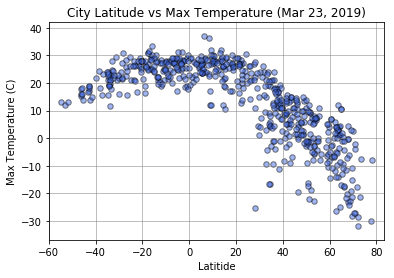

In [64]:
# Build the scatter plot

plt.scatter(weather_data["Latitude"],
            weather_data["Max Temperature"],  
            facecolors='royalblue', edgecolors="black", alpha=0.5,
            label = weather_data["City"],
            marker= "o", linewidth=1, 
            s= 30)
    
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (Mar 23, 2019)")
plt.xlabel("Latitide")
plt.ylabel("Max Temperature (C)")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(xmin= weather_data["Latitude"].min()-5, xmax= weather_data["Latitude"].max()+5)
plt.ylim(ymin= weather_data["Max Temperature"].min()-5, ymax= weather_data["Max Temperature"].max()+5)

# Save Figure
plt.savefig("City Latitude vs Max Temperature (Mar 23, 2019).png")

# Show plot
plt.show()

### Latitude vs. Humidity Plot

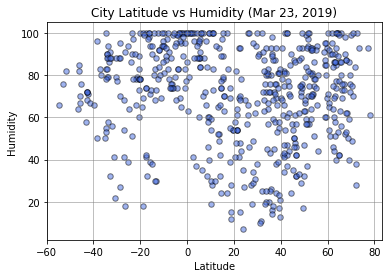

In [65]:
# Build the scatter plot

plt.scatter(weather_data["Latitude"],
            weather_data["Humidity"],  
            facecolors='royalblue', edgecolors="black", alpha=0.5,
            label = weather_data["City"],
            marker= "o", linewidth=1, 
            s= 30)
    
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (Mar 23, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(xmin= weather_data["Latitude"].min()-5, xmax= weather_data["Latitude"].max()+5)
plt.ylim(ymin= weather_data["Humidity"].min()-5, ymax= 100+5)

# Save Figure
plt.savefig("City Latitude vs Humidity (Mar 23, 2019).png")

# Show plot
plt.show()

###  Latitude vs. Cloudiness Plot

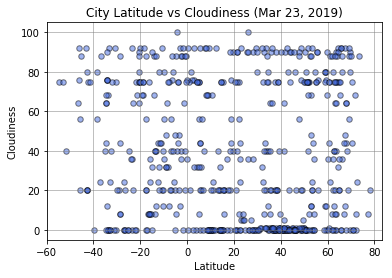

In [66]:
# Build the scatter plot

plt.scatter(weather_data["Latitude"],
            weather_data["Cloudiness"],  
            facecolors='royalblue', edgecolors="black", alpha=0.5,
            label = weather_data["City"],
            marker= "o", linewidth=1, 
            s= 30)
    
# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (Mar 23, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(xmin= weather_data["Latitude"].min()-5, xmax= weather_data["Latitude"].max()+5)
plt.ylim(ymin= weather_data["Cloudiness"].min()-5, ymax= weather_data["Cloudiness"].max()+5)

# Save Figure
plt.savefig("City Latitude vs Cloudiness (Mar 23, 2019).png")

# Show plot
plt.show()

###  Latitude vs. Wind Speed Plot

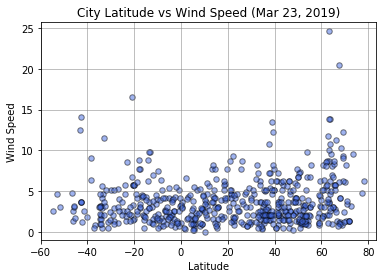

In [68]:
# Build the scatter plot

plt.scatter(weather_data["Latitude"],
            weather_data["Wind Speed"],  
            facecolors='royalblue', edgecolors="black", alpha=0.5,
            label = weather_data["City"],
            marker= "o", linewidth=1, 
            s= 30)
    
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (Mar 23, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.xlim(xmin= weather_data["Latitude"].min()-5, xmax= weather_data["Latitude"].max()+5)
plt.ylim(ymin= weather_data["Wind Speed"].min()-1, ymax= weather_data["Wind Speed"].max()+1)

# Save Figure
plt.savefig("City Latitude vs Wind Speed (Mar 23, 2019).png")

# Show plot
plt.show()

### Observable Trends Data

In [72]:
Hottest_Temperature = weather_data.sort_values(["Max Temperature"], ascending = False)
Hottest_Temperature.head()

,City,Country,Max Temperature,Humidity,Wind Speed,Latitude,Longditude,Cloudiness,Date
423,Puerto Carreno,CO,37.00,35,1.62,6.19,-67.49,56,1553374800
540,Barinas,VE,36.27,32,2.87,8.64,-70.23,0,1553378380
425,Pombas,BR,33.57,39,1.97,-15.90,-54.74,36,1553378342
404,LA MATA,CO,32.12,58,0.92,9.15,-73.75,0,1553378336
238,San Vicente,SV,32.00,52,3.60,13.64,-88.78,20,1553378115
